In [1]:
import numpy as np
import pandas as pd
from sklearn import tree, model_selection
from sklearn import tree, ensemble, model_selection, metrics
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from bayes_opt import BayesianOptimization

In [2]:
df = pd.read_csv('F:/Applied Machine Learning/Project/listing_data_clean_final_v2_extra.csv')

In [3]:
df.head(10)

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,...,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,rating_class,property_room_type
0,0.80,0.88,0,4.0,1,1,51.56802,-0.11121,1,Apartment,...,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,2,Apartment_Private room
1,1.00,0.86,0,1.0,1,1,51.48796,-0.16898,1,Apartment,...,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,2,Apartment_Entire home/apt
2,0.80,0.95,0,18.0,1,1,51.52195,-0.14094,0,Apartment,...,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,2,Apartment_Entire home/apt
3,1.00,0.93,1,1.0,1,0,51.44687,-0.21874,1,Apartment,...,1,1,1,1,877.248440,15618.994773,16654.097730,45.0,2,Apartment_Entire home/apt
4,0.90,1.00,1,3.0,1,0,51.57224,-0.20906,1,Apartment,...,1,1,1,1,628.660352,18016.436195,17493.813963,60.0,2,Apartment_Private room
5,1.00,0.85,0,2.0,1,1,51.46507,-0.32421,1,Apartment,...,1,0,1,1,1547.044208,22598.480547,23344.394742,67.0,2,Apartment_Private room
6,1.00,0.81,1,1.0,1,1,51.47934,-0.28066,0,Apartment,...,1,1,1,1,378.397034,19542.521887,20172.479358,197.0,2,Apartment_Entire home/apt
7,1.00,1.00,1,4.0,1,0,51.58461,-0.16170,0,Apartment,...,1,0,1,1,374.054937,16458.718168,15606.064671,87.0,2,Apartment_Private room
8,0.33,0.10,0,2.0,1,0,51.53972,-0.05885,0,Apartment,...,1,0,1,1,800.322416,8138.726963,7006.656799,410.0,2,Apartment_Entire home/apt
9,1.00,0.33,0,1.0,1,0,51.46871,-0.06455,1,Apartment,...,0,0,1,1,1845.919030,4664.509879,5834.915892,322.0,2,Apartment_Private room


In [4]:
df['bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch'],
      dtype=object)

In [5]:
df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'number_of_reviews_ltm', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'host_duration_days', 'listing_duration_days', 'region',
       'occupancy_rate', 'crime_rate', 'hangers', 'washer', 'tv', 'detector',
       'kitchen', 'heating', 'essentials', 'iron', 'wi

In [6]:
df['rating_class'].unique()

array([2, 1, 0], dtype=int64)

In [8]:
df['rating_class'].value_counts()

2    50118
1     5434
0     2084
Name: rating_class, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

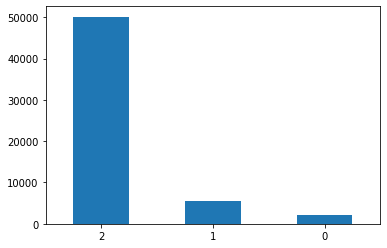

In [9]:
# Initial distribution of target
df['rating_class'].value_counts().plot(kind = 'bar')
plt.xticks(rotation=0)

In [10]:
df = df.drop(['latitude', 'longitude','number_of_reviews','reviews_per_month','host_total_listings_count','property_type','room_type','host_is_superhost'],axis = 1)

In [11]:
df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_has_profile_pic',
       'host_identity_verified', 'is_location_exact', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'number_of_reviews_ltm',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'host_duration_days',
       'listing_duration_days', 'region', 'occupancy_rate', 'crime_rate',
       'hangers', 'washer', 'tv', 'detector', 'kitchen', 'heating',
       'essentials', 'iron', 'wifi', 'dryer', 'min_dist_subway',
       'min_dist_park', 'min_dist_attraction', 'recency', 'rating_class',
       'property_room_type'],
      dtype='object')

In [12]:
pd.set_option('display.max_columns',200)

In [13]:
df.head(10)

,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews_ltm,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_duration_days,listing_duration_days,region,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,rating_class,property_room_type
0,0.80,0.88,1,1,1,2,1.0,1.0,0.0,Real Bed,65.0,100.0,15.0,1,15.0,1,29,6,0,moderate,0,0,1,2,0,3831.0,3556.0,Central,0.010959,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,2,Apartment_Private room
1,1.00,0.86,1,1,1,2,1.0,1.0,1.0,Real Bed,100.0,150.0,50.0,2,0.0,10,50,4,1,strict_14_with_grace_period,1,1,1,0,0,3812.0,3796.0,Central,0.298630,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,2,Apartment_Entire home/apt
2,0.80,0.95,1,1,0,6,2.0,3.0,3.0,Real Bed,300.0,350.0,90.0,3,10.0,3,365,2,1,strict_14_with_grace_period,0,0,15,0,0,3781.0,3340.0,Central,0.095890,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,2,Apartment_Entire home/apt
3,1.00,0.93,1,0,1,4,1.0,2.0,2.0,Real Bed,65.0,350.0,55.0,2,11.0,21,1125,8,0,moderate,0,0,1,0,0,3694.0,1531.0,South,0.884932,0.658,1,1,1,1,1,1,1,1,1,1,877.248440,15618.994773,16654.097730,45.0,2,Apartment_Entire home/apt
4,0.90,1.00,1,0,1,2,1.5,1.0,0.0,Real Bed,29.0,100.0,0.0,1,8.0,10,1120,8,1,strict_14_with_grace_period,0,0,0,3,0,3692.0,3683.0,North,0.087671,0.558,1,1,0,1,1,1,1,1,1,1,628.660352,18016.436195,17493.813963,60.0,2,Apartment_Private room
5,1.00,0.85,1,1,1,2,1.0,1.0,1.0,Real Bed,100.0,0.0,0.0,1,0.0,1,21,2,0,flexible,0,0,1,1,0,3622.0,3498.0,West,0.008219,0.713,0,1,0,1,1,1,1,0,1,1,1547.044208,22598.480547,23344.394742,67.0,2,Apartment_Private room
6,1.00,0.81,1,1,0,5,1.5,3.0,3.0,Real Bed,195.0,0.0,0.0,1,0.0,3,22,11,0,moderate,0,0,1,0,0,3606.0,3489.0,West,0.076712,0.499,1,1,1,1,1,1,1,1,1,1,378.397034,19542.521887,20172.479358,197.0,2,Apartment_Entire home/apt
7,1.00,1.00,1,0,0,2,0.0,1.0,0.0,Real Bed,72.0,0.0,0.0,1,0.0,2,365,35,1,strict_14_with_grace_period,0,0,0,4,0,3602.0,3530.0,North,0.126027,0.858,1,0,1,1,0,1,1,0,1,1,374.054937,16458.718168,15606.064671,87.0,2,Apartment_Private room
8,0.33,0.10,1,0,0,2,1.0,1.0,1.0,Real Bed,80.0,0.0,30.0,1,0.0,6,21,0,0,strict_14_with_grace_period,0,0,1,0,0,3599.0,3543.0,East,0.783562,0.912,1,1,1,1,1,1,1,0,1,1,800.322416,8138.726963,7006.656799,410.0,2,Apartment_Entire home/apt
9,1.00,0.33,1,0,1,2,1.0,1.0,1.0,Real Bed,70.0,0.0,0.0,1,10.0,2,21,2,0,strict_14_with_grace_period,0,0,0,1,0,3598.0,3585.0,Central,0.008219,0.879,0,0,1,0,0,1,0,0,1,1,1845.919030,4664.509879,5834.915892,322.0,2,Apartment_Private room


In [14]:
# To do
# Categorical encoding
# Train test split
# Feature scaling
# Hyperparameter tuning
# Model fit and evaluation metrics

### Categorical features encoding

In [15]:
df['bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch'],
      dtype=object)

In [16]:
df['property_room_type'].unique()

array(['Apartment_Private room', 'Apartment_Entire home/apt',
       'Apartment_Hotel room', 'Others_Private room',
       'Others_Entire home/apt', 'Guesthouse_Private room',
       'Guesthouse_Entire home/apt', 'Bungalow_Private room',
       'Apartment_Shared room', 'Others_Hotel room',
       'Bungalow_Entire home/apt', 'Hotel_Private room',
       'Hotel_Hotel room', 'Guesthouse_Shared room', 'Others_Shared room',
       'Guesthouse_Hotel room', 'Bungalow_Shared room',
       'Hotel_Entire home/apt', 'Hotel_Shared room'], dtype=object)

In [17]:
df['cancellation_policy'].unique()

array(['moderate', 'strict_14_with_grace_period', 'flexible',
       'super_strict_30', 'super_strict_60', 'strict'], dtype=object)

In [18]:
## For bed_type
df = pd.concat([df, pd.get_dummies(df['bed_type'], prefix = 'bed_type', prefix_sep = '_=_')], axis = 1).drop('bed_type', axis = 1)

In [19]:
## For region
df = pd.concat([df, pd.get_dummies(df['region'], prefix = 'region', prefix_sep = '_=_')], axis = 1).drop('region', axis = 1)

In [20]:
## For property_room_type
df = pd.concat([df, pd.get_dummies(df['property_room_type'], prefix = 'property_room_type', prefix_sep = '_=_').drop(['property_room_type_=_Others_Private room','property_room_type_=_Others_Entire home/apt','property_room_type_=_Others_Hotel room','property_room_type_=_Others_Shared room'], axis = 1)], axis = 1).drop('property_room_type', axis = 1)

In [21]:
## For cancellation_policy
df = pd.concat([df, pd.get_dummies(df['cancellation_policy'], prefix = 'cancellation_policy', prefix_sep = '_=_')], axis = 1).drop('cancellation_policy', axis = 1)

In [22]:
df.head()

,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews_ltm,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_duration_days,listing_duration_days,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,rating_class,bed_type_=_Airbed,bed_type_=_Couch,bed_type_=_Futon,bed_type_=_Pull-out Sofa,bed_type_=_Real Bed,region_=_Central,region_=_East,region_=_North,region_=_South,region_=_West,property_room_type_=_Apartment_Entire home/apt,property_room_type_=_Apartment_Hotel room,property_room_type_=_Apartment_Private room,property_room_type_=_Apartment_Shared room,property_room_type_=_Bungalow_Entire home/apt,property_room_type_=_Bungalow_Private room,property_room_type_=_Bungalow_Shared room,property_room_type_=_Guesthouse_Entire home/apt,property_room_type_=_Guesthouse_Hotel room,property_room_type_=_Guesthouse_Private room,property_room_type_=_Guesthouse_Shared room,property_room_type_=_Hotel_Entire home/apt,property_room_type_=_Hotel_Hotel room,property_room_type_=_Hotel_Private room,property_room_type_=_Hotel_Shared room,cancellation_policy_=_flexible,cancellation_policy_=_moderate,cancellation_policy_=_strict,cancellation_policy_=_strict_14_with_grace_period,cancellation_policy_=_super_strict_30,cancellation_policy_=_super_strict_60
0,0.8,0.88,1,1,1,2,1.0,1.0,0.0,65.0,100.0,15.0,1,15.0,1,29,6,0,0,0,1,2,0,3831.0,3556.0,0.010959,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,2,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1.0,0.86,1,1,1,2,1.0,1.0,1.0,100.0,150.0,50.0,2,0.0,10,50,4,1,1,1,1,0,0,3812.0,3796.0,0.298630,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,2,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.8,0.95,1,1,0,6,2.0,3.0,3.0,300.0,350.0,90.0,3,10.0,3,365,2,1,0,0,15,0,0,3781.0,3340.0,0.095890,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,2,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.0,0.93,1,0,1,4,1.0,2.0,2.0,65.0,350.0,55.0,2,11.0,21,1125,8,0,0,0,1,0,0,3694.0,1531.0,0.884932,0.658,1,1,1,1,1,1,1,1,1,1,877.248440,15618.994773,16654.097730,45.0,2,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.9,1.00,1,0,1,2,1.5,1.0,0.0,29.0,100.0,0.0,1,8.0,10,1120,8,1,0,0,0,3,0,3692.0,3683.0,0.087671,0.558,1,1,0,1,1,1,1,1,1,1,628.660352,18016.436195,17493.813963,60.0,2,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
df.describe()

,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews_ltm,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_duration_days,listing_duration_days,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,rating_class,bed_type_=_Airbed,bed_type_=_Couch,bed_type_=_Futon,bed_type_=_Pull-out Sofa,bed_type_=_Real Bed,region_=_Central,region_=_East,region_=_North,region_=_South,region_=_West,property_room_type_=_Apartment_Entire home/apt,property_room_type_=_Apartment_Hotel room,property_room_type_=_Apartment_Private room,property_room_type_=_Apartment_Shared room,property_room_type_=_Bungalow_Entire home/apt,property_room_type_=_Bungalow_Private room,property_room_type_=_Bungalow_Shared room,property_room_type_=_Guesthouse_Entire home/apt,property_room_type_=_Guesthouse_Hotel room,property_room_type_=_Guesthouse_Private room,property_room_type_=_Guesthouse_Shared room,property_room_type_=_Hotel_Entire home/apt,property_room_type_=_Hotel_Hotel room,property_room_type_=_Hotel_Private room,property_room_type_=_Hotel_Shared room,cancellation_policy_=_flexible,cancellation_policy_=_moderate,cancellation_policy_=_strict,cancellation_policy_=_strict_14_with_grace_period,cancellation_policy_=_super_strict_30,cancellation_policy_=_super_strict_60
count,57636.000000,57636.000000,57636.000000,57636.000000,57636.00000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,5.763600e+04,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000
mean,0.571354,0.677360,0.997415,0.389479,0.69009,3.226907,1.295640,1.397338,1.748872,105.034354,127.931518,33.202859,1.668089,8.310709,4.200881,2.734735e+04,7.636963,0.417499,0.012319,0.020109,12.237091,2.178916,0.045197,1688.395048,873.889583,0.661572,0.936650,0.838608,0.861979,0.704334,0.902162,0.917708,0.960424,0.955028,0.805556,0.973211,0.838296,1049.077268,11378.863962,11359.936546,347.432785,1.833403,0.000399,0.000781,0.002082,0.004962,0.991776,0.444080,0.272278,0.050784,0.093206,0.139652,0.573201,0.005778,0.388750,0.004043,0.001353,0.001770,0.000052,0.003852,0.001093,0.005136,0.000972,0.000035,0.000868,0.002915,0.000017,0.253106,0.281439,0.000052,0.460441,0.002759,0.002203
std,0.470711,0.394608,0.050779,0.487636,0.46246,1.970470,0.593854,0.882589,1.256607,90.324988,259.680701,37.959294,1.356096,14.203951,19.048802,4.704378e+06,12.276630,0.493151,0.110305,0.140374,70.369099,11.369813,0.689160,803.092092,626.800745,0.378550,0.325922,0.367895,0.344925,0.456345,0.297098,0.274812,0.194962,0.207244,0.395776,0.161467,0.368183,1503.902458,5244.719393,5439.748352,420.469006,0.459524,0.019973,0.027931,0.045582,0.070268,0.090314,0.496867,0.445136,0.219559,0.290723,0.346629,0.494617,0.075792,0.487471,0.063453,0.036763,0.042031,0.007214,0.061943,0.033044,0.071480,0.031156,0.005891,0.029441,0.053911,0.004165,0.434795,

### Train test split

In [35]:
x = df.drop('rating_class',axis=1)
y = df['rating_class']

In [36]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 1234)

In [37]:
x_train

,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews_ltm,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_duration_days,listing_duration_days,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,bed_type_=_Airbed,bed_type_=_Couch,bed_type_=_Futon,bed_type_=_Pull-out Sofa,bed_type_=_Real Bed,region_=_Central,region_=_East,region_=_North,region_=_South,region_=_West,property_room_type_=_Apartment_Entire home/apt,property_room_type_=_Apartment_Hotel room,property_room_type_=_Apartment_Private room,property_room_type_=_Apartment_Shared room,property_room_type_=_Bungalow_Entire home/apt,property_room_type_=_Bungalow_Private room,property_room_type_=_Bungalow_Shared room,property_room_type_=_Guesthouse_Entire home/apt,property_room_type_=_Guesthouse_Hotel room,property_room_type_=_Guesthouse_Private room,property_room_type_=_Guesthouse_Shared room,property_room_type_=_Hotel_Entire home/apt,property_room_type_=_Hotel_Hotel room,property_room_type_=_Hotel_Private room,property_room_type_=_Hotel_Shared room,cancellation_policy_=_flexible,cancellation_policy_=_moderate,cancellation_policy_=_strict,cancellation_policy_=_strict_14_with_grace_period,cancellation_policy_=_super_strict_30,cancellation_policy_=_super_strict_60
39789,0.9,0.86,1,0,1,5,1.0,2.0,3.0,279.0,0.0,0.0,1,0.0,1,90,2,1,0,0,41,1,0,1891.0,455.0,0.032877,1.713,1,1,1,1,1,1,1,1,1,1,356.601344,10238.164007,10216.643472,313.0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21101,1.0,0.96,1,1,0,2,1.0,1.0,1.0,80.0,250.0,60.0,2,0.0,2,1125,0,0,0,0,241,5,0,1894.0,1038.0,1.000000,1.713,1,1,0,1,1,1,1,1,1,1,596.329768,13472.078713,13387.412973,501.0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
46263,1.0,0.88,1,0,1,4,2.5,2.0,3.0,469.0,0.0,199.0,1,0.0,8,365,4,0,0,0,1,0,0,367.0,235.0,0.010959,0.658,1,1,1,1,1,1,1,1,1,1,623.335716,9092.364804,9735.327980,166.0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2041,1.0,0.15,1,0,1,3,1.0,1.0,0.0,28.0,0.0,0.0,1,5.0,1,31,5,0,0,0,0,2,0,2755.0,2404.0,0.312329,0.674,0,1,1,1,1,1,1,0,1,1,7874.068040,10641.113708,12963.935995,120.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30261,1.0,0.96,1,0,1,1,1.0,1.0,0.0,30.0,0.0,0.0,1,0.0,1,1125,8,0,0,0,0,1,0,785.0,779.0,1.000000,0.674,1,1,0,1,1,1,1,1,1,1,9740.883104,8686.481863,12272.098349,214.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,0.0,0.00,1,1,1,2,1.0,1.0,1.0,80.0,0.0,15.0,2,20.0,2,1125,0,1,0,0,2,0,0,2217.0,1230.0,1.000000,0.535,1,1,1,1,1,1,1,1,1,1,264.380933,15355.912008,16677.054968,998.0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23924,0.0,0.00,1,1,1,2,1.5,1.0,1.0,34.0,0.0,5.0,1,0.0,2,1125,0,1,0,0,0,1,0,1955.0,1002.0,1.000000,0.999,0,1,1,1,1,0,1,0,1,1,644.929249,12820.458956,11852.453520,1002.0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
56373,1.0,0.98,1,1,0,2,1.0,1.0,1.0,40.0,0.0,0.0,2,10.0,1,1125,10,1,0,0,0,4,0,126.0,112.0,0.030137,1.098,1,0,0,1,0,0,1,0,0,0,344.518345,13957.945604,14418.227814,59.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
34086,0.0,1.00,1,1,1,2,1.0,1.0,1.0,40.0,0.0,15.0,1,9.0,2,1125,1,1,0,0,1,0,0,1021.0,665.0,1.000000,0.713,1,1,0,1,1,1,1,1,1,1,1505.638303,25318.607871,26100.881308,354.0,0,0,0,0

In [38]:
x_test.shape

(11528, 72)

In [39]:
y_train.value_counts()

2    40057
1     4403
0     1648
Name: rating_class, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

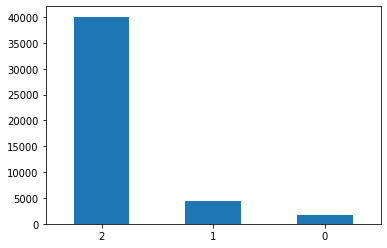

In [40]:
y_train.value_counts().plot(kind = 'bar')
plt.xticks(rotation=0)

### Random under sampler

In [41]:
from imblearn.under_sampling import RandomUnderSampler

In [42]:
rus = RandomUnderSampler()

In [43]:
x_train, y_train  = rus.fit_sample(x_train, y_train)

In [44]:
x_train

,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews_ltm,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_duration_days,listing_duration_days,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,bed_type_=_Airbed,bed_type_=_Couch,bed_type_=_Futon,bed_type_=_Pull-out Sofa,bed_type_=_Real Bed,region_=_Central,region_=_East,region_=_North,region_=_South,region_=_West,property_room_type_=_Apartment_Entire home/apt,property_room_type_=_Apartment_Hotel room,property_room_type_=_Apartment_Private room,property_room_type_=_Apartment_Shared room,property_room_type_=_Bungalow_Entire home/apt,property_room_type_=_Bungalow_Private room,property_room_type_=_Bungalow_Shared room,property_room_type_=_Guesthouse_Entire home/apt,property_room_type_=_Guesthouse_Hotel room,property_room_type_=_Guesthouse_Private room,property_room_type_=_Guesthouse_Shared room,property_room_type_=_Hotel_Entire home/apt,property_room_type_=_Hotel_Hotel room,property_room_type_=_Hotel_Private room,property_room_type_=_Hotel_Shared room,cancellation_policy_=_flexible,cancellation_policy_=_moderate,cancellation_policy_=_strict,cancellation_policy_=_strict_14_with_grace_period,cancellation_policy_=_super_strict_30,cancellation_policy_=_super_strict_60
0,1.00,1.00,1,0,0,2,1.0,0.0,1.0,60.0,200.0,60.0,2,0.0,1,1125,2,1,0,0,27,0,0,346.0,319.0,0.013699,1.713,1,1,1,1,1,1,1,1,1,1,171.227783,12808.750366,12822.409886,310.0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.00,0.00,1,0,0,2,1.0,1.0,1.0,55.0,0.0,0.0,1,0.0,5,1125,0,1,0,0,1,0,0,2478.0,1817.0,1.000000,0.858,0,1,1,0,1,1,1,0,1,1,750.812829,14246.134958,13369.926892,1764.0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.00,0.00,1,0,0,2,1.0,1.0,1.0,70.0,0.0,0.0,1,0.0,2,5,1,0,0,0,0,1,0,1818.0,363.0,0.764384,0.658,0,1,1,1,1,1,1,1,1,1,1768.516007,12659.654734,13516.453856,363.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.00,0.00,1,0,1,2,1.0,1.0,1.0,50.0,0.0,0.0,1,0.0,3,1125,0,0,0,0,0,1,0,895.0,860.0,1.000000,0.853,1,1,1,1,1,1,1,1,1,1,958.398913,7279.369432,6560.752501,860.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.30,0.96,1,0,1,1,1.0,1.0,1.0,30.0,0.0,20.0,2,19.0,10,1125,2,1,0,0,1,53,0,799.0,655.0,0.106849,1.713,1,1,0,0,1,1,0,1,1,1,373.565446,15509.652719,15446.665432,274.0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,0.00,0.50,1,1,1,5,1.0,3.0,4.0,97.0,0.0,45.0,4,15.0,3,1125,3,0,0,0,1,0,0,1721.0,1380.0,1.000000,0.649,1,1,0,1,1,1,1,1,1,1,820.645641,12666.233250,10965.597607,129.0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4940,1.00,1.00,1,1,1,2,1.0,1.0,1.0,40.0,0.0,5.0,1,5.0,3,1125,6,1,0,0,0,1,0,3002.0,1337.0,0.295890,0.558,1,1,0,1,1,1,1,1,1,1,384.670756,21543.869404,20989.702978,67.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4941,0.90,0.98,1,0,0,2,1.5,1.0,1.0,30.0,0.0,0.0,1,10.0,1,1125,9,1,0,0,0,12,0,555.0,278.0,0.008219,0.558,1,1,0,1,0,1,1,1,1,0,765.323733,22501.257162,21953.477581,146.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4942,0.95,0.92,1,0,0,8,2.0,3.0,4.0,160.0,0.0,50.0,1,0.0,3,60,3,0,0,0,34,0,0,3102.0,916.0,0.010959,0.716,1,1,1,1,1,1,1,1,1,1,751.990145,2390.441301,474.139432,152.0,0,0,0,0,1,0,1,0,0,0,1,0,0,0

In [45]:
y_train.value_counts()

2    1648
1    1648
0    1648
Name: rating_class, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

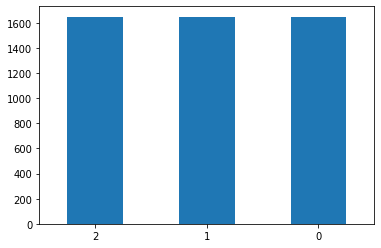

In [46]:
y_train.value_counts().plot(kind = 'bar')
plt.xticks(rotation=0)

### Hyperparameter tuning

In [48]:
parameters = {'boosting_type': ['gbdt','dart'],'learning_rate' : [0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1], 'max_depth':[5,10], 'reg_alpha' :[0,0.01,0.1,0.5,1],
             'reg_lambda':[0,0.01,0.1,0.5,1], 'n_estimators' : [10,20,30,50,100,150,200,300], 'bagging_fraction' :[0.1,0.3,0.5,0.8,1],
             'bagging_freq':[10,50,100,200,500], 'feature_fraction': [0.1,0.3,0.5,0.8]}

#clf = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv = model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1234))
clf = model_selection.RandomizedSearchCV(lgb.LGBMClassifier(random_state  = 1234),param_distributions = parameters, cv = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1234), n_iter = 20, scoring = 'accuracy')
clf.fit(x_train, y_train)
print('best parameters: ', clf.best_params_)

best parameters:  {'reg_lambda': 0.1, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'feature_fraction': 0.5, 'boosting_type': 'dart', 'bagging_freq': 500, 'bagging_fraction': 0.8}


In [49]:
def lgbm_evaluate(**param_range): 
    params = {}
    #params['boosting_type'] = 'gbdt'
    params['objective'] = 'multiclass'
    params['metric'] = 'multi_logloss'
    params['num_class'] = 3
    params['learning_rate']=param_range['learning_rate']
    params['feature_fraction']=param_range['feature_fraction']
    params['bagging_fraction']=param_range['bagging_fraction']
    params['bagging_freq']=int(round(param_range['bagging_freq']))
    params['max_depth']=int(round(param_range['max_depth']))
    params['reg_alpha']=param_range['reg_alpha']
    params['reg_lambda']=param_range['reg_lambda']
    #params['num_boost_round']=int(round(param_range['num_boost_round ']))
    #params['min_gain_to_split']=min_gain_to_split
    #lgb_train_data = lgb.Dataset(x_train, label=y_train, free_raw_data = None)
    lgb_train_data = lgb.Dataset(x_train, label=y_train, free_raw_data=False )
    cv_result = lgb.cv(params,lgb_train_data,num_boost_round = 100, nfold=5, seed=1234, stratified=True,shuffle = True, metrics=['multi_logloss'])
    return -min(cv_result['multi_logloss-mean'])

    #cv_result = lgb.cv(params,lgb_train_data, nfold =5, stratified  = True, shuffle  = True, seed =1234)

In [50]:
param_range={
#'boosting_type':['gbdt','dart'],  
'learning_rate':(0.03, 0.1),
'feature_fraction': (0.1, 1),
'bagging_fraction': (0.1, 1),
'bagging_freq':(0, 500),
'max_depth': (5, 10),
'reg_alpha':(0,1),
'reg_lambda':(0,1),
'min_gain_to_split':(0, 5)}

In [51]:
bo = BayesianOptimization(lgbm_evaluate, param_range)
bo.maximize(init_points = 5, n_iter = 20, acq = 'ei')

|   iter    |  target   | baggin... | baggin... | featur... | learni... | max_depth | min_ga... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------------------------------
|  1        | -0.95     |  0.2308   |  184.2    |  0.7674   |  0.0662   |  5.698    |  3.097    |  0.07347  |  0.2393   |
|  2        | -0.8921   |  0.9548   |  14.16    |  0.73     |  0.07067  |  5.852    |  0.0315   |  0.1847   |  0.357    |
|  3        | -0.9065   |  0.8093   |  419.4    |  0.2921   |  0.08472  |  6.612    |  1.712    |  0.7457   |  0.8573   |
|  4        | -0.9399   |  0.5531   |  106.7    |  0.1514   |  0.08361  |  9.389    |  0.3251   |  0.3511   |  0.281    |
|  5        | -0.9139   |  0.6041   |  227.6    |  0.7772   |  0.03932  |  6.837    |  3.89     |  0.2306   |  0.3881   |
|  6        | -0.8986   |  0.7952   |  14.06    |  0.8913   |  0.04957  |  5.856    |  0.2128   |  0.5267   |  0.8762   |
|  7        | -0.9253   

In [52]:
parameters = bo.max['params']

In [53]:
final_parameters = {}
final_parameters.update({'boosting_type':'gbdt'})
for k, v in parameters.items():
    if k in ['bagging_freq','min_data_in_leaf','max_depth','max_bin','num_leaves','k_range']:
        final_parameters[k] = int(round(v))
    else:
        final_parameters[k] = round(v,4)

In [54]:
final_parameters

{'boosting_type': 'gbdt',
 'bagging_fraction': 0.9548,
 'bagging_freq': 14,
 'feature_fraction': 0.73,
 'learning_rate': 0.0707,
 'max_depth': 6,
 'min_gain_to_split': 0.0315,
 'reg_alpha': 0.1847,
 'reg_lambda': 0.357}

### Model fitting and obtaining evaluation metrics

In [70]:
light = lgb.LGBMClassifier(boosting_type = 'gbdt', learning_rate  = 0.0707, max_depth = 6, reg_alpha  = 0.1847, reg_lambda = 0.357,
                           bagging_fraction= 0.9548, bagging_freq = 14,feature_fraction = 0.73,min_gain_to_split = 0.0315, n_estimators = 100, random_state  = 1234)
                          #class_weight = {0:9.32605178,1:3.49065031,2:0.38368658})

In [71]:
light.fit(x_train, y_train)

LGBMClassifier(bagging_fraction=0.9548, bagging_freq=14, feature_fraction=0.73,
               learning_rate=0.0707, max_depth=6, min_gain_to_split=0.0315,
               random_state=1234, reg_alpha=0.1847, reg_lambda=0.357)

In [72]:
y_pred = light.predict(x_test)

In [73]:
print(metrics.accuracy_score(y_test, y_pred))

0.5884802220680083


In [74]:
light_report = """
The evaluation report of LightGBM is:
Confusion Matrix:
{}
Accuracy: {}
""".format(metrics.confusion_matrix(y_test, y_pred),
           metrics.accuracy_score(y_test, y_pred))
print(light_report)
print('The classification report of LightGBM:\n {}'
      .format(metrics.classification_report(y_test, y_pred)))


The evaluation report of LightGBM is:
Confusion Matrix:
[[ 310   89   37]
 [ 330  422  279]
 [2113 1896 6052]]
Accuracy: 0.5884802220680083

The classification report of LightGBM:
               precision    recall  f1-score   support

           0       0.11      0.71      0.19       436
           1       0.18      0.41      0.25      1031
           2       0.95      0.60      0.74     10061

    accuracy                           0.59     11528
   macro avg       0.41      0.57      0.39     11528
weighted avg       0.85      0.59      0.67     11528



In [75]:
light_prob = light.predict_proba(x_test)

In [76]:
n_classes = 3

In [77]:
#y_train = label_binarize(y_train, classes=[0, 1, 2])
y_test = label_binarize(y_test, classes=[0, 1, 2])

In [78]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], light_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), light_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

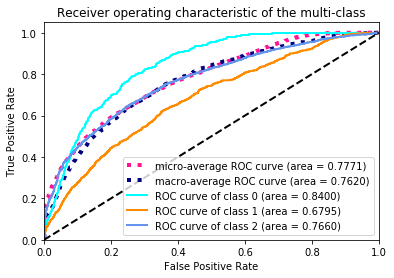

In [79]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
lw = 2
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of the multi-class')
plt.legend(loc="lower right")
plt.show()

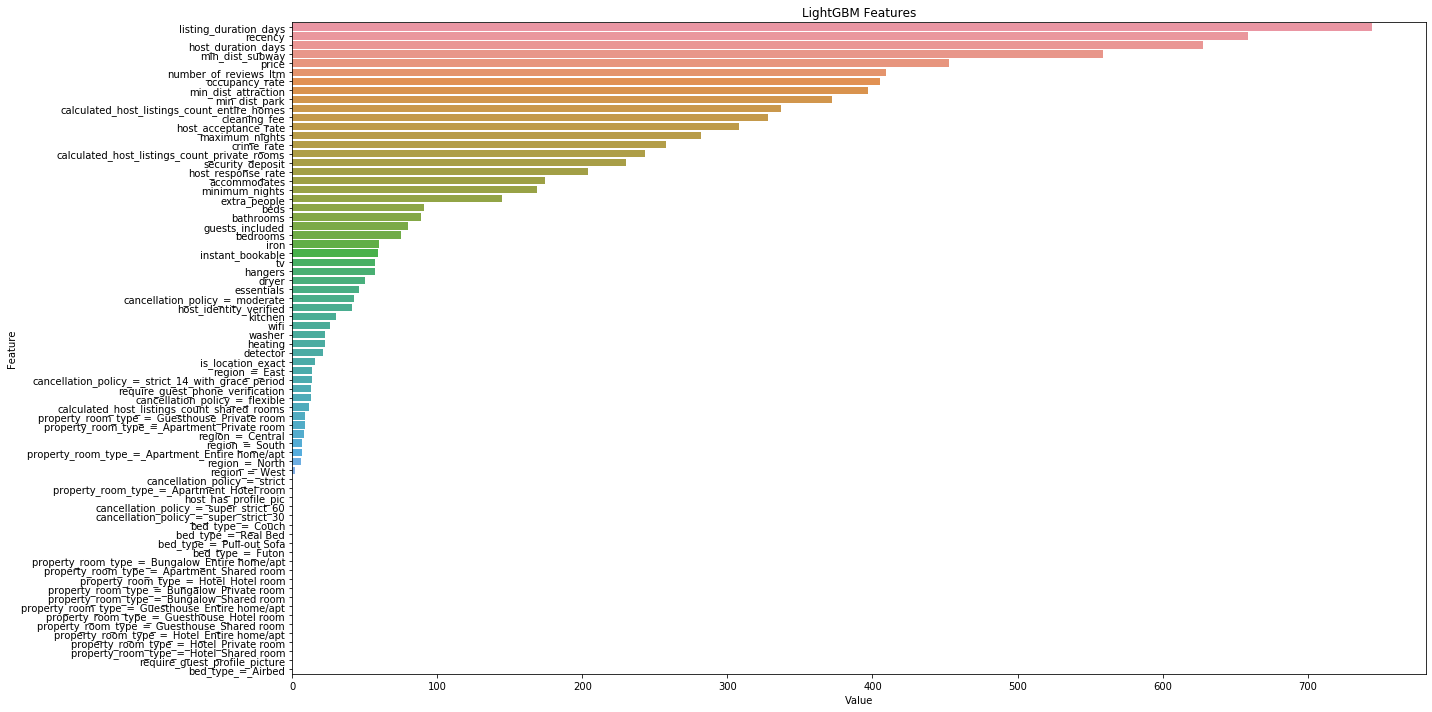

In [80]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(light.feature_importances_,x.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [ ]:
## Comments : Does not give good results both with and without feature scaling